# Intro

This file contains some code for predicting prices using the Prophet library from Meta. We just wanted to test out how this library is
and see if we can find anything else, and we actually did. This library lets you seperate the data into different time components, so
you can see how the stock fluctuates over a day, week, month, or year, and this can be helpful if you want to decide what the best time
is to buy and sell a stock.

In [9]:
import yfinance as yf

In [10]:
# Get the data ready
apple_data = yf.download("ACB", period="max", interval="1d")
apple_data.dropna()
apple_data.reset_index(inplace=True)
apple_data.fillna(method="pad")
apple_data

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_171745/3350479859.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  apple_data.fillna(method="pad")


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-15,78.599998,84.239998,72.120003,72.120003,72.120003,1604
1,2014-07-16,70.919998,76.680000,70.919998,76.680000,76.680000,18
2,2014-07-17,76.680000,76.680000,76.680000,76.680000,76.680000,0
3,2014-07-18,76.680000,76.680000,76.680000,76.680000,76.680000,0
4,2014-07-21,71.040001,71.040001,71.040001,71.040001,71.040001,25
...,...,...,...,...,...,...,...
2444,2024-04-01,4.330000,4.385000,4.150000,4.310000,4.310000,3960200
2445,2024-04-02,4.310000,5.479000,4.260000,5.005000,5.005000,14436300
2446,2024-04-03,5.060000,7.390000,4.950000,7.210000,7.210000,42139400
2447,2024-04-04,7.280000,8.880000,6.460000,7.060000,7.060000,63412600


In [11]:
# Drop all the columns except the Close column because tha is what we want to predict (you can change this)
apple_data = apple_data.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis=1)
apple_data.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)
apple_data

,ds,y
0,2014-07-15,72.120003
1,2014-07-16,76.680000
2,2014-07-17,76.680000
3,2014-07-18,76.680000
4,2014-07-21,71.040001
...,...,...
2444,2024-04-01,4.310000
2445,2024-04-02,5.005000
2446,2024-04-03,7.210000
2447,2024-04-04,7.060000


In [12]:
# Import the prophet library
import prophet
from prophet import Prophet

# Fit the data
m = Prophet(interval_width=0.95, daily_seasonality=True)
m.fit(apple_data)

21:27:54 - cmdstanpy - INFO - Chain [1] start processing
21:27:55 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Make the dataframe then predict
future = m.make_future_dataframe(periods=5, freq="D")
future.tail()

,ds
2449,2024-04-06
2450,2024-04-07
2451,2024-04-08
2452,2024-04-09
2453,2024-04-10


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2449,2024-04-06,-11.120772,-185.203611,177.470651
2450,2024-04-07,-11.842155,-207.384515,163.079707
2451,2024-04-08,-9.801856,-189.938979,176.401288
2452,2024-04-09,-8.513166,-195.780529,163.998427
2453,2024-04-10,-9.034858,-210.510378,179.602907


/home/user/miniconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/user/miniconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


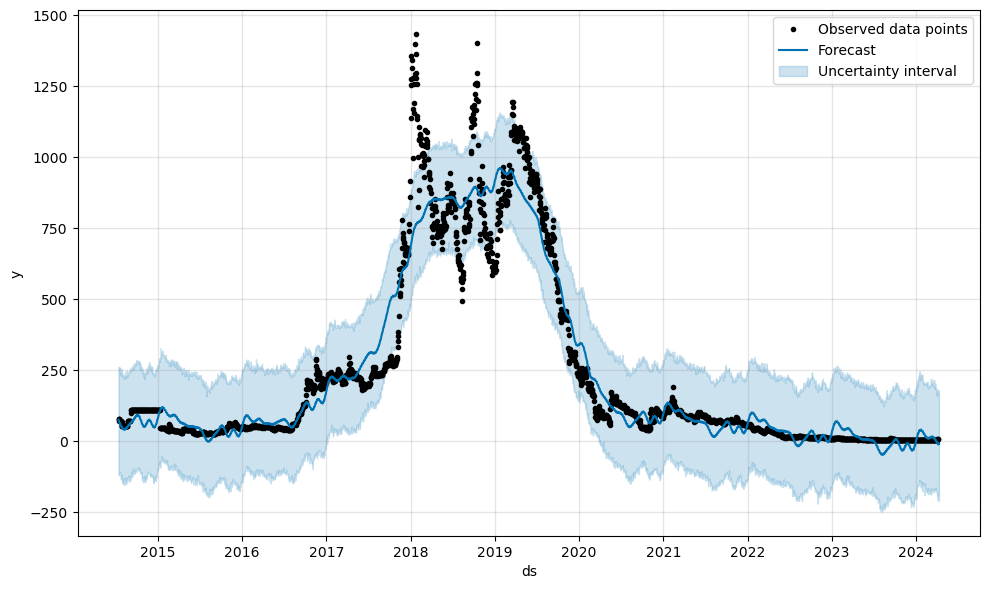

In [15]:
# Plot the predictions
fig1 = m.plot(forecast, include_legend=True)

/home/user/miniconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/user/miniconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/user/miniconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain th

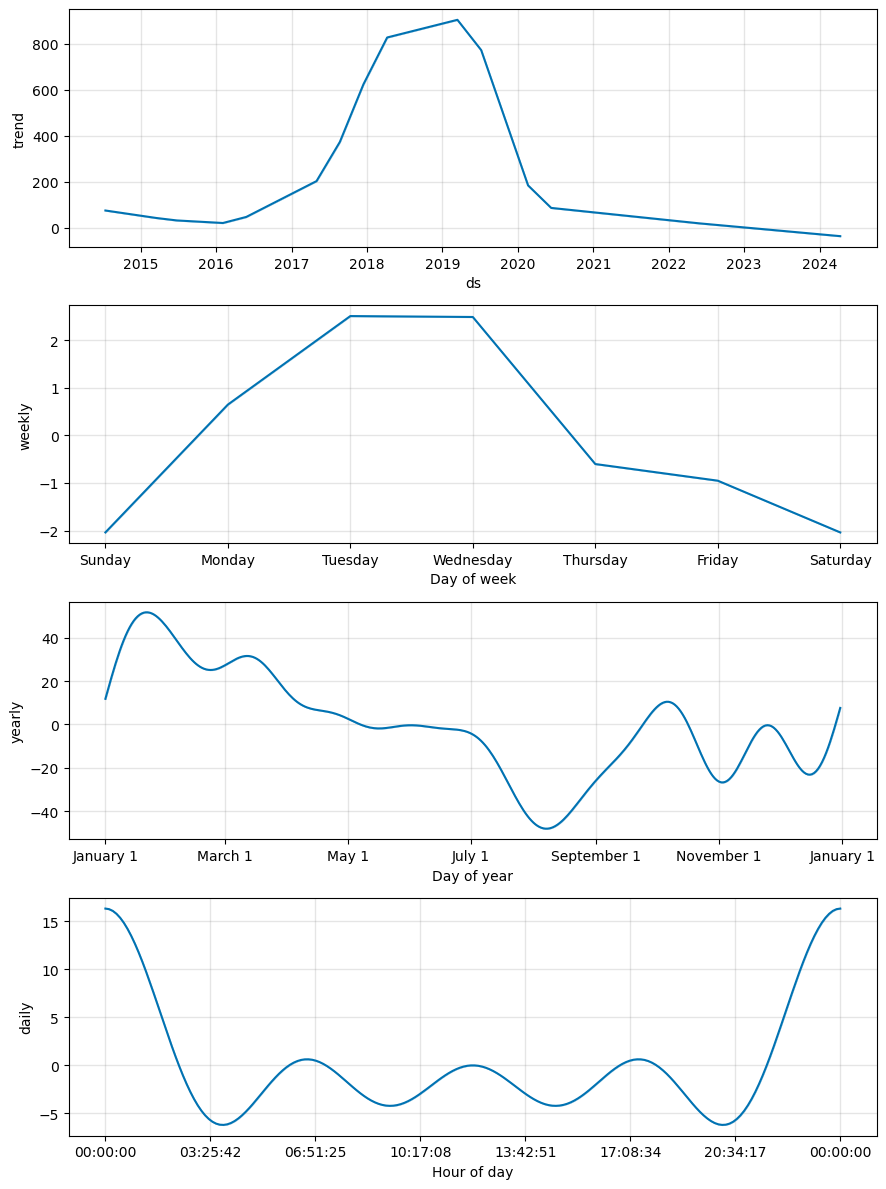

In [16]:
# Plot the individual components, this can be useful to see how the stock fluctuates over different
# time periods
fig2 = m.plot_components(forecast)